## Principal Component Analysis (PCA)

PCA şu amaçlar için kullanılır:

    1- Feature extraction: Mevcut feature'lerden yeni feature'ler oluşturulabilir.
    
    2- Feature dimension reduction: Feature sayısını azaltma işlemidir.
    
    3- Stock market prediction
    
    4- Gene data analysis
    
Feature dimension reduction ile ilgileneceğiz.

Gerçek hayatta binlerce feature ile karşılaşabiliriz. Bu durumda eğitim ve test çok zorlaşabilir. Dolayısıyla feature dimension reduction yapmamız gerekir. Ayrıca mesela 10 boyutlu bir data var. Bu data'yı görselleştiremeyiz çünkü böyle bir görselleştirme tekniği yok. x,y,z koordinat sisteminde 3 boyutlu yapılabilir, alan ekleriz 4 boyutlu olur, renk ekleriz 5 boyutlu olur. Fakat 10 boyuta kadar çıkamayız. Bu yüzden PCA kullanarak 10 boyutlu data'yı mesela 2 boyuta düşürebiliriz ve görselleştirme yapmamız mümkün hale gelir.

Yüksek boyuttan düşük boyuta indirgenken dikkat edilmesi gereken nokta, varyans olabildiğince büyük olmalıdır. Varyansın büyük olmasından kasıt, data kaybedilmemesidir. Eğer varyans yüksekse data kaybedilmemiştir.

Feature dimension reduction yaptıktan sonra eğer gerçekten varyans değeri iyiyse ve gerekli bileşenler varsa orjinal data'yı tekrardan elde edebiliriz.

Şimdi iki boyutlu data'yı PCA ile 1 boyuta düşürelim. Bunu yaparken ilk amacımız varyansın maksimum değere sahip olmasıdır. Varyansın matematikteki karşılığını değişkenlik yani yayılım olarak düşünebiliriz.

<br><br>
<img src="p2.png" align="left" style="width:450px;height:300px"/>

Yukarıda gördüğünüz x eksenindeki yatay kırmızı çizgi ve y eksenindeki dikey yeşil çizgi varyanslardır. Amaç PCA yaparken maksimum varyansı elde etmektir. Dolayısıyla data'da maksimum varyans siyah çizgidir. Bu siyah çizgi principle component olarak adlandırılır. Bu principle component data'yı varyansı maksimum olacak şekilde ifade etmekte. x1 ve x2 feature'lerini kullanmak yerine sadece principle component'i kullanarak data'yı ifade edebiliriz. Böylelikle iki tane feature'den bir tane feature'ye düşürmüş olduk.

İki tane component çıkartmak istersek, ikinci component'in adı "second component" olur:

İki feature olan data'dan 1 tane veya 2 tane component elde edilebilir. 3 tane elde edilemez.

<br><br>
<img src="p3.png" align="left" style="width:450px;height:300px"/>

PCA yöntemini feature'lerin sayısını azaltmak için kullanıyoruz. Şimdi de bu yöntemi koda dökelim.

sklearn kütüphanesi, içerisinde veri seti de bulundurmaktadır. sklearn kütüphanesinden import ederek iris veri setini kullanalım.

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

iris = load_iris()

In [3]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

iris veri seti içerisinde numpy array'leri barındıran bir yapıdır.

In [5]:
data = iris.data
feature_names = iris.feature_names
y = iris.target  # target feature'sinde 0,1,2 şeklinde 3 tane sınıf vardır.

Şimdi bir data frame oluşturalım.

In [8]:
df = pd.DataFrame(data, columns=feature_names)

In [9]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
df["sinif"] = y

In [11]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),sinif
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
 df.sinif.unique()

array([0, 1, 2])

sinif feature'sinde bulunan 0,1 ve 2 değerlerinin her biri farklı bir çiçek türünü ifade etmekte. Bu türler; setosa, versicolor, virginica 'dır.

In [13]:
x = data #data'nın tipi numpy array'dir. Dolayısıyla data.values demeye gerek yoktur.

Data'yı PCA yöntemi ile 4 boyuttan 2 boyuta düşürerek görselleştirelim.

In [17]:
from sklearn.decomposition import PCA #PCA metodunu import ettim.

pca = PCA(n_components=2, whiten=True)

pca.fit(x)

PCA(n_components=2, whiten=True)

n_components=2 parametresi ile orjinal data'nın boyutunu kaç boyuta düşürmek istediğimizi belirtiriz.

whiten=True parametresi ile normalize edebiliriz. Normalize işlemi ile feature'lerin değerlerini 0 ile 1 arasına çekerek bir feature'nin diğer feature'yi etkisizleştirmesini önleriz. Böylece principle component gibi ayarlamalar doğru bir şekilde yapılabilir.

fit metodunu fit(x,y) şeklinde kullanıyorduk. Burada y, label değerleriydi. Bir prediction veya machine learning algoritması eğitimi gerçekleştirmediğimiz için label değerlerine yani y'ye ihtiyacımız yoktur. Dolayısıyla pca.fit(x) şeklinde data'nın 4 boyutunu 2'ye düşürebiliriz.

pca.fit(x) ile 4 boyutlu datayı 2 boyuta düşürecek modeli elde ettim. Ama bunu transform ile uygulayabilirim. Yukarıdaki kod bloğu ile boyutu düşürmüş olmuyoruz, sadece boyutu düşürecek modeli elde etmiş oluyoruz. Yani işin matematiğini yapmış oluyoruz.

In [18]:
x_pca = pca.transform(x)

Yukarıdaki satır ile, x'i PCA modeline göre 4 boyuttan 2 boyuta düşürdük ve x_pca değişkenine atadık.

In [19]:
x_pca

array([[-1.30533786,  0.64836932],
       [-1.31993521, -0.35930856],
       [-1.40496732, -0.29424412],
       [-1.33510889, -0.64613986],
       [-1.32702321,  0.6633044 ],
       [-1.10922246,  1.50488434],
       [-1.3716775 , -0.18160462],
       [-1.27714084,  0.33166784],
       [-1.40369908, -1.17396001],
       [-1.29980851, -0.23095919],
       [-1.2191728 ,  1.30947554],
       [-1.27062918,  0.02990145],
       [-1.35493432, -0.47727214],
       [-1.5677929 , -1.03811965],
       [-1.28618899,  2.39286603],
       [-1.16037307,  2.71623681],
       [-1.2758681 ,  1.64566141],
       [-1.28791362,  0.63304684],
       [-1.06981161,  1.77184386],
       [-1.25858365,  1.04251602],
       [-1.12351854,  0.79442356],
       [-1.23704894,  0.87897239],
       [-1.56396833,  0.27093722],
       [-1.11985996,  0.20037678],
       [-1.14564495, -0.07568135],
       [-1.21903752, -0.29641102],
       [-1.20063096,  0.26582861],
       [-1.24610158,  0.74646111],
       [-1.28365251,

Çıktıda görüldüğü üzere iki tane feature elde edildi. Bu feature'lerden birisi principle component ve diğeri second component'tir. Hangi feature'nin hangi component olduğunu anlamak için de şöyle bir yöntem kullanacağız:

In [23]:
print("variance ratio: ", pca.explained_variance_ratio_)
#Elde edilen 2 boyutlu data'nın, eski 4 boyutlu data'nın ne kadarını temsil edebildiğine baktık.

variance ratio:  [0.92461872 0.05306648]


Çıktıyı yorumlayalım. %92'lik kısım principle component'tir. %5'lik kısım second component'tir.

PCA'de öncelikli amaç varyansı korumaktır.Data'yı 4 boyuttan 2 boyuta düşürüyoruz ama data'nın sağladığı bilgileri korumalıyız. Bilgilerin ne kadarını koruduğumuzu öğrenelim.

In [24]:
print("sum: ",sum(pca.explained_variance_ratio_))

sum:  0.9776852063187949


Çıktıda görüldüğü üzere, %97 oranında varyansa sahibiz. %3'lük bir bilgi kaybı olmuştur. Varyansı korumuş oluyoruz diyebiliriz.

Şimdi data'yı görselleştirelim.

In [25]:
df["p1"] = x_pca[:,0]
df["p2"] = x_pca[:,1]

Yukarıdaki satırda yapılan şudur: variance ratio:  [0.92461872 0.05306648] çıktısında %92 'lik kısmı p1'e yani principle component'e eşitledim. Ve %5'lik kısmını p2'ye yani second component'e eşitledim.

In [26]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),sinif,p1,p2
0,5.1,3.5,1.4,0.2,0,-1.305338,0.648369
1,4.9,3.0,1.4,0.2,0,-1.319935,-0.359309
2,4.7,3.2,1.3,0.2,0,-1.404967,-0.294244
3,4.6,3.1,1.5,0.2,0,-1.335109,-0.646140
4,5.0,3.6,1.4,0.2,0,-1.327023,0.663304


p1 ve p2 feature'leri data'nın orjinalindeki 4 tane feature'nin 2 boyuta düşürülmesi sonucunda elde edilen feature'lerdir.

p1 = principle component

p2 = second component

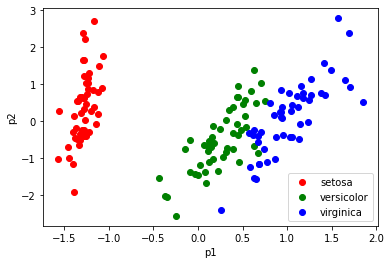

In [29]:
color = ["red", "green", "blue"]   # 3 farklı çiçek türü olduğu için 3 farklı renkle görselleştiririz.

import matplotlib.pyplot as plt

for each in range(3): #3 farklı iris türü olduğu için range(3) dedik. sinif classı içerisinde 0,1,2 değerleir vardı ve range(3) ile bu değerler sağlanmıştır.
    plt.scatter(df.p1[df.sinif==each],df.p2[df.sinif==each], color=color[each], label=iris.target_names[each])
    
plt.legend()
plt.xlabel("p1")
plt.ylabel("p2")
plt.show()

Data'yı 4 boyuttan 2 boyuta düşürmemize rağmen, %3'lükte olsa veri kaybetmemize rağmen, yinede türler arasında gözle görülebilir şekilde bir ayrım vardır.